In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a Dataset with 1000 samples, 2 Classess nd Imbalaanced class distribution

In [3]:
from sklearn.datasets import make_classification # imported code from make classification documentation by sklearn


## Code for imbaanced Dataset

In [5]:
x,y = make_classification(n_samples=1000,n_classes=2,n_features=2,weights=[0.9,0.1],random_state=42,n_informative=2, n_redundant=0, n_repeated=0)

# Note :
The make_classification() function requires that the sum of n_informative, n_redundant, and n_repeated features be less than or equal to n_features. Let's correct that by explicitly specifying n_informative and setting n_redundant and n_repeated to 0.

## Convert to DataFrame

In [8]:
df = pd.DataFrame(x, columns = ["feature1","feature2"])
df["Target"] = y

In [9]:
# Display the first few rows
df.head()

,feature1,feature2,Target
0,-0.058619,-0.351090,0
1,1.246686,1.153597,1
2,0.962777,0.859397,1
3,-2.957441,2.033645,1
4,0.871229,-1.205785,0


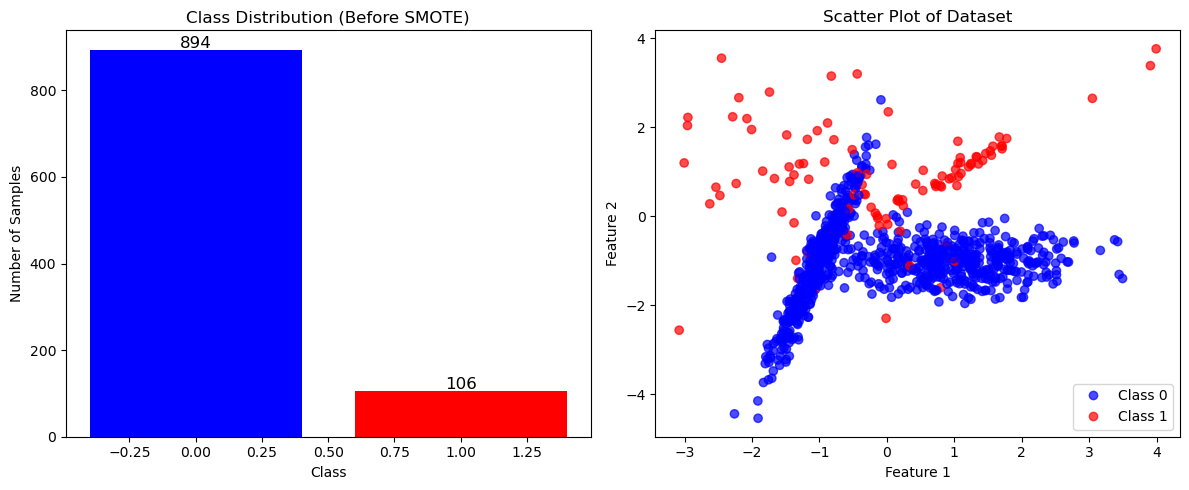

In [10]:
import matplotlib.pyplot as plt

# Create figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# ---- Subplot 1: Bar Chart (Class Distribution) ----
class_counts = df["Target"].value_counts()
axes[0].bar(class_counts.index, class_counts.values, color=['blue', 'red'])
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Number of Samples")
axes[0].set_title("Class Distribution (Before SMOTE)")

# Show count values on bars
for i, count in enumerate(class_counts.values):
    axes[0].text(i, count + 5, str(count), ha='center', fontsize=12)

# ---- Subplot 2: Scatter Plot ----
scatter = axes[1].scatter(df["feature1"], df["feature2"], c=df["Target"], cmap="bwr", alpha=0.7)
axes[1].set_xlabel("Feature 1")
axes[1].set_ylabel("Feature 2")
axes[1].set_title("Scatter Plot of Dataset")
axes[1].legend(handles=scatter.legend_elements()[0], labels=["Class 0", "Class 1"])

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


# Why is Synthetic SMOTE a Better Option?
Synthetic Minority Over-sampling Technique (SMOTE) is better than both undersampling and oversampling because:

✅ It generates synthetic samples rather than just duplicating existing data, reducing the risk of overfitting.
✅ It preserves important information in the majority class, unlike undersampling.
✅ It increases diversity in the minority class, improving generalization.
✅ It helps the model learn better decision boundaries, making it more robust.

Conclusion
- Use undersampling if you have a very large dataset and want to reduce training time.

- Use oversampling if you don’t want to lose any information but can handle the risk of overfitting.

- Use SMOTE when you need a balanced dataset while maintaining diversity and avoiding overfitting.

## SMOTE

In [13]:
from imblearn.over_sampling import SMOTE

In [14]:
smote = SMOTE(random_state=42)

In [15]:
# Separate features (X) and target (y)
X = df[['feature1', 'feature2']]
y = df['Target']

In [16]:
X_resampled, y_resampled = smote.fit_resample(X, y)

In [17]:
# Convert resampled data back to DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=['feature1', 'feature2'])
df_resampled['Target'] = y_resampled

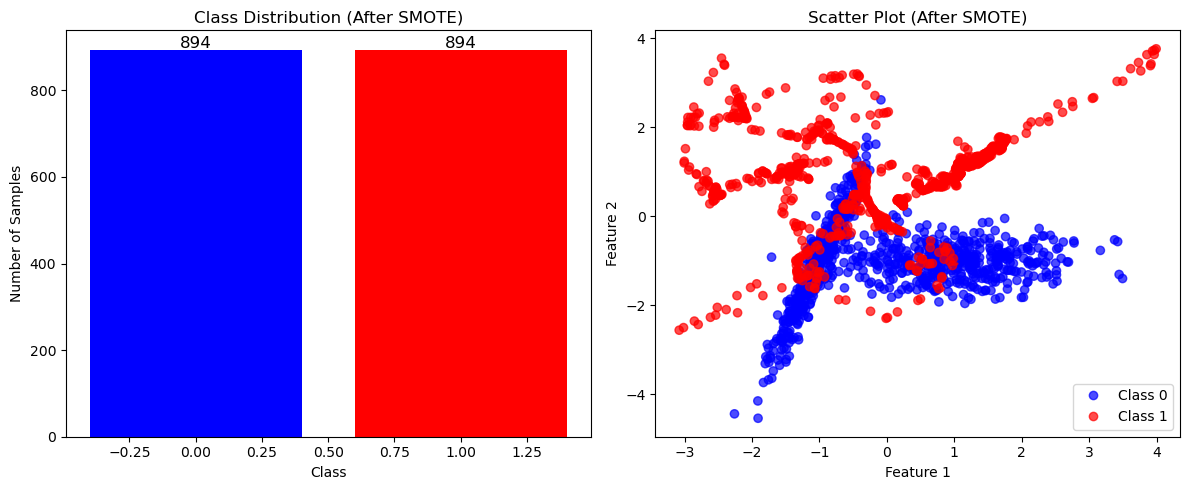

In [18]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# ---- Subplot 1: Bar Chart (Class Distribution) ----
class_counts = df_resampled["Target"].value_counts()
axes[0].bar(class_counts.index, class_counts.values, color=['blue', 'red'])
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Number of Samples")
axes[0].set_title("Class Distribution (After SMOTE)")

# Show count values on bars
for i, count in enumerate(class_counts.values):
    axes[0].text(i, count + 5, str(count), ha='center', fontsize=12)

# ---- Subplot 2: Scatter Plot ----
scatter = axes[1].scatter(df_resampled["feature1"], df_resampled["feature2"], 
                          c=df_resampled["Target"], cmap="bwr", alpha=0.7)
axes[1].set_xlabel("Feature 1")
axes[1].set_ylabel("Feature 2")
axes[1].set_title("Scatter Plot (After SMOTE)")
axes[1].legend(handles=scatter.legend_elements()[0], labels=["Class 0", "Class 1"])

# Adjust layout and show the plot
plt.tight_layout()
plt.show()
